# On the need for discretization when multiple solutions are suspected

## Neural Network is trained to fit y = $\pm$ sqr(X). The solution is bi-valuated. 

## The simple regressor is unable to return the 2 solutions.

***

### Useful libraries are imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

### The Keras backend can be changed before importing the TMNI package. Default is Tensorflow, Theano can be sued.

In [2]:
#os.environ['KERAS_BACKEND'] = 'theano'

In [3]:
# Import the TMNI. If not installed, install it
try:
    import tmniai as tm
except:
    !pip install -U git+https://github.com/taller-mexicano-de-nebulosas-ionizadas/AI.git
    import tmniai as tm

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Define the samples used for traing and test.

In [4]:
n_samples=1000
y1 = np.random.uniform(-10, 10, n_samples)
X1 = y1**2
y2 = np.random.uniform(0, 10, n_samples)
X2 = y2**2
X_test = np.linspace(0,100,1000)

### The prediction of the simple regressor is close to 0.0, as it is a mean of the 2 solutions.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


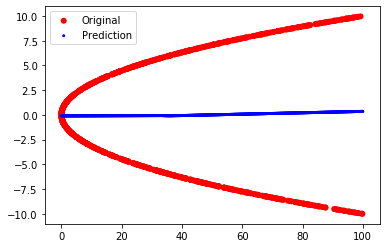

In [5]:
RM = tm.manage_RM(RM_type = 'Keras', X_train=X1, y_train=y1,
                   scaling=True, clear_session=True)
RM.init_RM(hidden_layer_sizes=(10,), epochs=50)
RM.train_RM()
RM.set_test(X_test, scaleit=True)
RM.predict(scoring=False)
pred = RM.pred
f, ax = plt.subplots()
ax.scatter(X1, y1, edgecolor='', c='r', label='Original')
ax.scatter(X_test, pred, edgecolor='', c='b', marker='.', label='Prediction')
ax.legend();

### Using a vector of y instead of a simple value.

In [6]:
y_vects = np.linspace(-10,10,100)
RM = tm.manage_RM(RM_type = 'KerasDis', X_train=X1, y_train=y1,
                   scaling=True, clear_session=True, y_vects=y_vects)
RM.init_RM(hidden_layer_sizes=(10,), epochs=50)
RM.train_RM()
RM.set_test(X_test, scaleit=True)
RM.predict(scoring=False)
pred = RM.pred

### The predictions is not a single value anymore. It is a probability on the y_vect values.

In [7]:
print(pred.shape)

(1000, 100)


### For each value of the X_test set, a distribution function can be obtained and drawn. Expected values are shown in red.

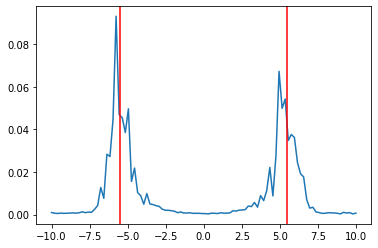

In [8]:
i = 300
x_true = np.sqrt(X_test[i])
f, ax = plt.subplots()
ax.plot(y_vects, pred[i,:])
ax.axvline(x_true, c='red')
ax.axvline(-x_true, c='red');

### A function is used to test the different options. When a discretization is done, the prediction can be defined as the mean of the distribution, or its maximum value. Both options are explored.

In [9]:
def test_x2(X, y, X_test, solver='adam', activation='tanh', hidden_layer_sizes=(10,), noise=False, 
            discret=False, verbose=False, plot_ori=True):
    """
    Creating, training and ploting Regressor Machine for y = sqrt(X) problem.
    Using the tmniai Regressor machine tool
    """
    if plot_ori:
        plt.scatter(X, y, edgecolor='', c='r', label='Ori')
    if discret:
        RM1 = tm.manage_RM(RM_type = 'KerasDis', X_train=X, y_train=y, verbose=verbose, 
                        noise=noise, y_vects=y_vects, scaling=True, 
                        clear_session=True)
        RM1.init_RM(solver=solver, activation=activation,
                    hidden_layer_sizes=hidden_layer_sizes, epochs=50)
        RM1.train_RM()
        RM1.set_test(X_test, scaleit=True)
        RM1.predict(scoring=False, reduce_by='max')
        pred_max = RM1.pred
        RM1.predict(scoring=False, reduce_by='mean')
        pred_mean = RM1.pred
        plt.scatter(X_test, pred_max, edgecolor='', c='y', label='Max')
        plt.scatter(X_test, pred_mean, edgecolor='', c='c', label='Mean')    
    else:
        RM1 = tm.manage_RM(RM_type = 'Keras', X_train=X, y_train=y, verbose=verbose, 
                        noise=noise, scaling=True, clear_session=True)
        RM1.init_RM(solver=solver, activation=activation,
                    hidden_layer_sizes=hidden_layer_sizes, epochs=50)
        RM1.train_RM()
        RM1.set_test(X_test, scaleit=True)
        RM1.predict(scoring=False)
        pred = RM1.pred
        plt.scatter(X_test, pred, edgecolor='', c='b', marker='.', label='Single')
    plt.legend()

### Training with positive and negative values leads to wrong result from the single regressor.

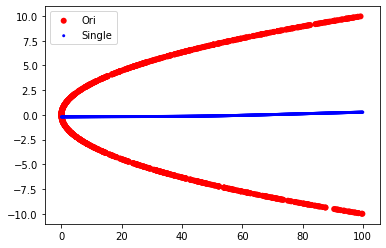

In [10]:
test_x2(X1, y1, X_test)

### Training with positive and negative values leads to wrong result from the mean of the discretized regressor.
### The max value is OK

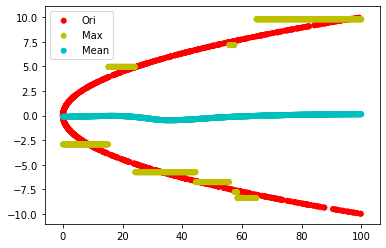

In [11]:
test_x2(X1, y1, X_test, discret=True)

### Training with positive values only solves the issue. But data can be double valued without the user knowing it.

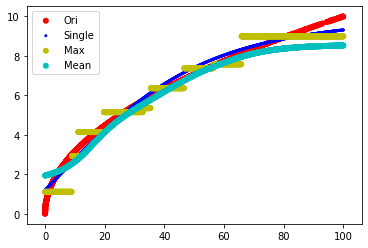

In [12]:
test_x2(X2, y2, X_test)
test_x2(X2, y2, X_test, discret=True, plot_ori=False)

### Adding noise to the [-10, 10] data set

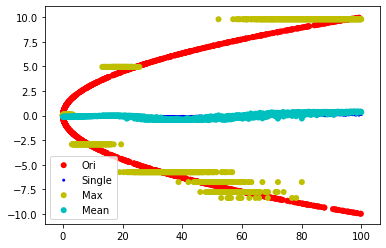

In [13]:
test_x2(X1, y1, X_test, noise=0.1)
test_x2(X1, y1, X_test, noise=0.1, discret=True, plot_ori=False)

### Close-up to the single regressor result: it appears to be a small but small relation (plus noise), not 0.0 mean.

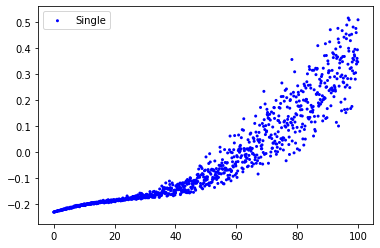

In [14]:
test_x2(X1, y1, X_test, noise=0.1, discret=False, plot_ori=False)